In [1]:
library(ggplot2)
library(Hmisc)
source("../utilis/utilis.R")
library(glue)
library(dplyr)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
threshold = 1
cutoff_column = 'pval'
data_df_path =  '../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PS_sel_one_wayANOVA_hMinImp_TICnorm_groupFil0.3_RPneg_fullreport.csv'
meta_df_path =  '../../../../seq/RPneg_addgrp.csv'

# Prepare the data

## Read and transform the data table and metadata table

In [3]:
PS_df = read.csv(data_df_path)
meta_df = read.csv(meta_df_path)

In [4]:
rownames(meta_df) = meta_df$Sample_ID_upd

----

In [5]:
grepl("^PS",PS_df[['Species.Shorthand']])

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE

In [6]:
PS_df = PS_df[grepl("^PS",PS_df[['Species.Shorthand']]),]

In [7]:
head(PS_df)

,id_number,X.M.H.,Species.Shorthand,Formula,Neutral_Mass,Common.Name,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,⋯,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F10088,706.5023,PS O-31:0,C37H74NO9P,707.5101,PS(O-16:0/15:0);PS(O-18:0/13:0),22.54975,22.24230,22.23288,21.81227,⋯,21.86124,22.15218,22.33243,22.05573,22.41003,22.47504,22.62447,22.23000,22.06893,21.66625
2,F10378,798.5285,PS 37:3,C43H78NO10P,799.5363,"PS(15:1(9Z)/22:2(13Z,16Z));PS(17:0/20:3(8Z,11Z,14Z));PS(17:1(9Z)/20:2(11Z,14Z));PS(17:2(9Z,12Z)/20:1(11Z));PS(18:2(9Z,12Z)/19:1(9Z));PS(18:3(6Z,9Z,12Z)/19:0);PS(18:3(9Z,12Z,15Z)/19:0);PS(19:0/18:3(6Z,9Z,12Z));PS(19:0/18:3(9Z,12Z,15Z));PS(19:1(9Z)/18:2(9Z,12Z));PS(20:1(11Z)/17:2(9Z,12Z));PS(20:2(11Z,14Z)/17:1(9Z));PS(20:3(8Z,11Z,14Z)/17:0);PS(22:2(13Z,16Z)/15:1(9Z))",19.06636,19.48094,18.38050,17.41191,⋯,17.73458,19.49869,19.46319,18.76382,17.99717,19.02478,19.10794,18.58974,19.04283,19.35432
3,F10486,734.5336,PS O-33:0,C39H78NO9P,735.5414,PS(O-18:0/15:0);PS(O-20:0/13:0);PS(O-16:0/17:0),21.70652,21.27973,21.17554,20.71313,⋯,20.92549,21.16842,21.39104,21.14028,21.21081,21.64365,21.76940,21.34766,20.93304,20.73375
4,F11304,768.5179,PS O-36:4,C42H76NO9P,769.5258,"PS(O-18:0/18:4(6Z,9Z,12Z,15Z));PS(P-16:0/20:3(8Z,11Z,14Z));PS(P-18:0/18:3(6Z,9Z,12Z));PS(P-18:0/18:3(9Z,12Z,15Z));PS(O-16:0/20:4(5Z,8Z,11Z,14Z))",18.88689,20.00413,19.68771,19.77977,⋯,20.67266,19.81125,20.19701,18.88689,20.48852,18.88689,18.88689,18.88689,19.88689,18.88689
5,F11498,810.5285,PS 38:4,C44H78NO10P,811.5363,"PS(18:0/20:4(5Z,8Z,11Z,14Z));PS(18:1(9Z)/20:3(8Z,11Z,14Z));PS(18:2(9Z,12Z)/20:2(11Z,14Z));PS(18:3(6Z,9Z,12Z)/20:1(11Z));PS(18:3(9Z,12Z,15Z)/20:1(11Z));PS(18:4(6Z,9Z,12Z,15Z)/20:0);PS(20:1(11Z)/18:3(6Z,9Z,12Z));PS(20:1(11Z)/18:3(9Z,12Z,15Z));PS(20:2(11Z,14Z)/18:2(9Z,12Z));PS(20:3(8Z,11Z,14Z)/18:1(9Z));PS(20:4(5Z,8Z,11Z,14Z)/18:0);PS(22:4(7Z,10Z,13Z,16Z)/16:0);PS(20:0/18:4(6Z,9Z,12Z,15Z));PS(16:0/22:4(7Z,10Z,13Z,16Z))",22.04917,21.30051,22.90533,21.10479,⋯,19.40956,23.19147,19.40956,22.33489,23.47578,22.15057,21.94778,22.46777,22.55083,22.76086
6,F11849,772.5492,PS O-36:2,C42H80NO9P,773.5571,"PS(O-16:0/20:2(11Z,14Z));PS(O-18:0/18:2(9Z,12Z));PS(P-16:0/20:1(11Z));PS(P-20:0/16:1(9Z));PS(P-18:0/18:1(9Z))",20.94223,20.16111,20.79937,21.35875,⋯,21.08936,19.57186,20.75036,20.77075,20.82799,20.83698,21.04747,20.78279,20.87980,20.67922


----

In [8]:
grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(PS_df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [9]:
data_df = PS_df[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(PS_df))]

In [10]:
head(data_df)

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.76329,21.86124,22.15218,22.33243,22.05573,22.41003,22.47504,22.62447
2,17.08924,17.73458,19.49869,19.46319,18.76382,17.99717,19.02478,19.10794
3,20.50078,20.92549,21.16842,21.39104,21.14028,21.21081,21.64365,21.76940
4,18.88689,20.67266,19.81125,20.19701,18.88689,20.48852,18.88689,18.88689
5,22.80002,19.40956,23.19147,19.40956,22.33489,23.47578,22.15057,21.94778
6,21.62814,21.08936,19.57186,20.75036,20.77075,20.82799,20.83698,21.04747


----

In [11]:
head(meta_df)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
Blank_1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
Blank_2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
Blank_std_1,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
Qstd_1,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
Qstd_2,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
pooled_1,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5


In [12]:
rownames(meta_df) = meta_df$Sample_ID_upd

----

In [13]:
# lookUpAnnot <- function(annot_df,
#                         FeatureID,
#                         look4column = '') {
#     output = annot_df[annot_df[,'id_number'] == FeatureID,look4column]
#     return(output)
# }

# lookUpAnnot(annot_df,'F8342','Species.Shorthand')

## Transform and merge data

In [14]:
source('../utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'group',
                                 cutoff_column = 'padj', 
                                 threshold = threshold) {
    
    df_filt <- df[df[,cutoff_column] < threshold,
              colnames(df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Tn',
                  'CD8stem',
                  'CD8trans',
                  'CD8TD')
    )
    return(merged_df)
}

In [15]:
merged_df <- transform_merge_data4violin(df = PS_df,
                                         meta_df = meta_df,
                                         class_column = 'group',
                                         cutoff_column = 'pval', 
                                         threshold = threshold)

In [16]:
colnames(merged_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"          
[13] "1"                 "2"                 "3"                
[16] "4"                 "5"                 "6"                
[19] "7"                 "8"                 "9"                
[22] "10"                "11"                "12"               
[25] "13"                "14"                "15"               
[28] "16"                "17"                "18"               
[31] "19"                "20"                "21"               
[34] "22"                "23"                "24"               
[37] "25"                "26"                "28"               
[40] "29"                "30"                "35"               
[43] "37"                "38"                "39"               
[46] "40"                "41"

# Output directory

In [17]:
output_dir = "../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PS_strict_sum_boxplot_upd/"
dir.create(output_dir)

In [18]:
rowsums = rowSums(2^(merged_df[,(ncol(meta_df)+1):ncol(merged_df)]))

In [19]:
PSsum_df = merged_df[,3:7] # 
PSsum_df$PS_sum = rowsums

In [20]:
PSsum_df

,Sample.ID,Sample_ID_upd,cell_number,group,Comment,PS_sum
,<chr>,<chr>,<chr>,<fct>,<int>,<dbl>
CD8stem_250K_1,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,146465314
CD8stem_300K_2,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,126370249
CD8TD_750K_1,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,241717495
CD8TD_750K_2,CD8T_TD_750k_01_02,CD8TD_750K_2,750000,CD8TD,1,231937853
CD8trans_250K_2,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,167116143
CD8trans_350K_1,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,152167865
Tn_250K_1,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,124451936
Tn_250K_2,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,129616624


# Wrapper Function: plot a single box plot

In [21]:
box_plot <- function(long_df = merged_df,
                        x = 'group',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'group',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#0000ff","#FFA500","#ff0000")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


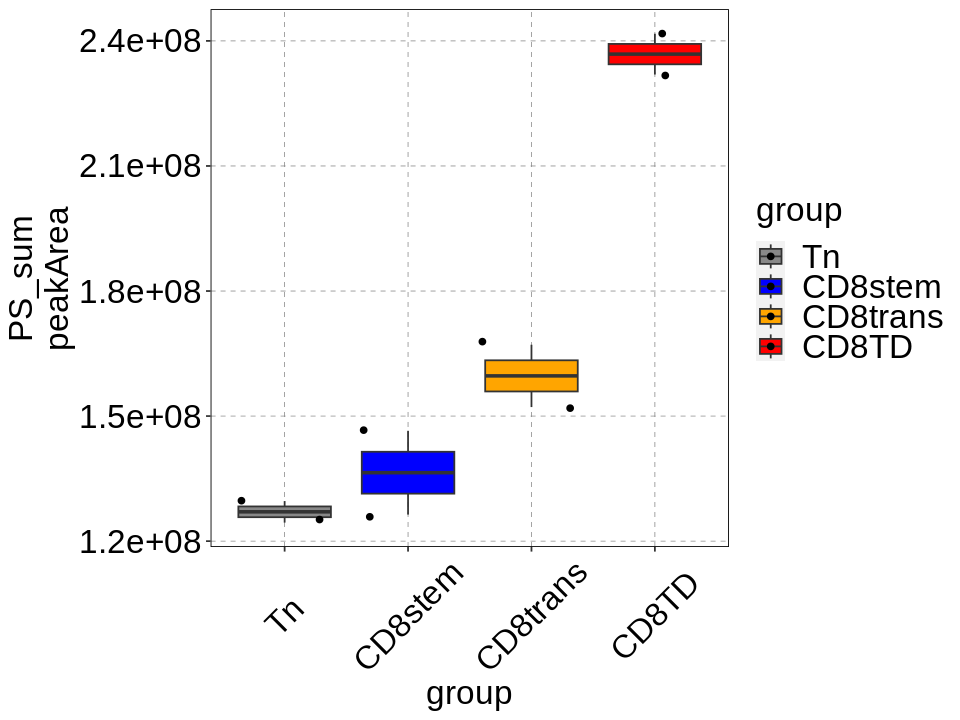

In [22]:
var = 'PS_sum'
box_plot(long_df = PSsum_df,
            x = 'group',
            y = var,
            xlab = 'group',
            ylab = glue('{var}\npeakArea'),
            fill_color = 'group',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'strict_PS_sum_RPneg')